# Pandas数据读入

In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

### 查看训练数据集信息

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 导入需要的包，进行数据处理

In [7]:
# Importing packages
import numpy as np
import pandas as pd
import os
from pandas import DataFrame,Series
from sklearn import tree
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import neighbors
from sklearn import linear_model
%matplotlib inline

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


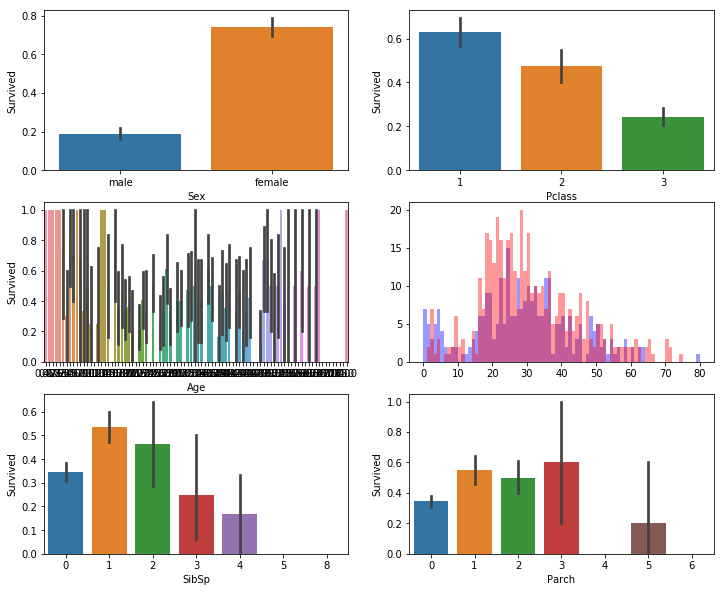

In [8]:
surv = train['Survived'] == 1
die = train['Survived'] == 0
plt.figure(figsize=[12,10])
plt.subplot(321)
sns.barplot('Sex','Survived',data = train)
plt.subplot(322)
sns.barplot('Pclass','Survived',data = train)
plt.subplot(323)
sns.barplot('Age','Survived',data = train)
plt.subplot(324)
sns.distplot(train[surv]['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(train[die]['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red')
plt.subplot(325)
sns.barplot('SibSp','Survived',data = train)
plt.subplot(326)
sns.barplot('Parch','Survived',data = train)

## 一副揭示'Pclass'，'Sex'与'Survived'关系的琴图
与本文无关

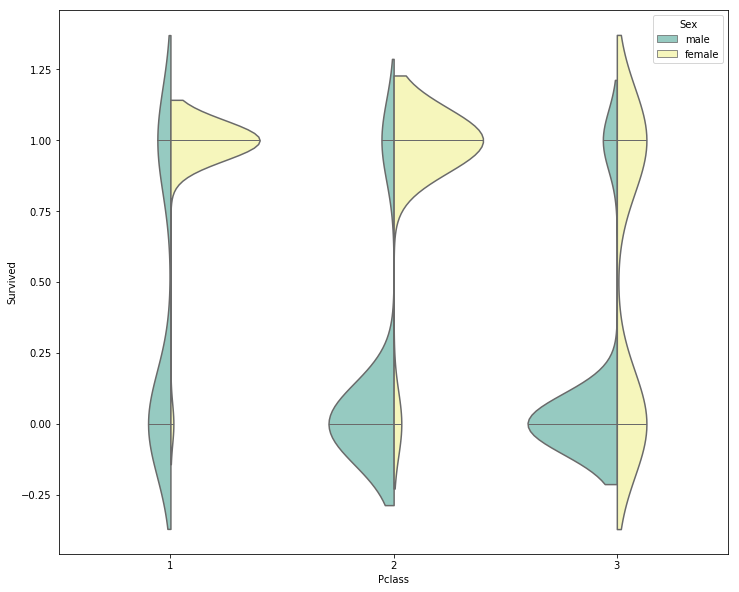

In [9]:
surv = train['Survived'] == 1
die = train['Survived'] == 0
plt.figure(figsize=[12,10])
sns.violinplot('Pclass','Survived',hue='Sex',data = train, split=True, inner="stick", palette="Set3")

# 数据处理
### 数据数值化('Sex', 'Embarked')

In [10]:
sex = np.zeros(len(train))
sex[train['Sex']== 'male'] = 1
sex[train['Sex']== 'female'] = 0
train['Sex'] = sex

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)
Embarked = np.zeros(len(train))
Embarked[train['Embarked']== 'C'] = 1
Embarked[train['Embarked']== 'Q'] = 2
Embarked[train['Embarked']== 'S'] = 3
train['Embarked'] = Embarked
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,7.2500,NaN,3.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,53.1000,C123,3.0
4,5,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,8.0500,NaN,3.0


### 删除数据集中的无用信息('PassengerId','Name', 'Ticket')
### 删除缺失严重的信息('Cabin')

In [12]:
print(type(train))
dropping = ['PassengerId','Name', 'Ticket','Cabin']
train.drop(dropping,axis=1, inplace=True)
test.drop(dropping,axis=1, inplace=True)
train.head()

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,3.0
1,1,1,0.0,38.0,1,0,71.2833,1.0
2,1,3,0.0,26.0,0,0,7.9250,3.0
3,1,1,0.0,35.0,1,0,53.1000,3.0
4,0,3,1.0,35.0,0,0,8.0500,3.0


### 利用平均值填补'Age'数据缺失

In [13]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
age = np.zeros(len(train))
age[train['Age']<20] = 1
age[(train['Age']>=20)&(train['Age']<60)] = 2
age[(train['Age']>=60)] = 3
train['Age'] = age
train.head()
train_new=train
train_new.to_csv("train_new.csv", index=False)

# 绘制特征相关性的热力图

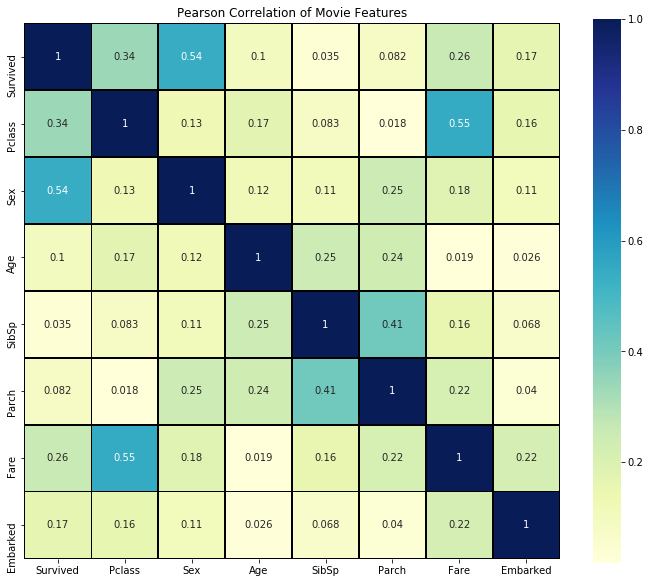

In [14]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(abs(train.astype(float).corr()),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

### 由相关性的热力图可知，Sex、Pclass、Fare对能否存活影响最大

# SVM模型

In [15]:
from sklearn import svm

In [16]:
train_y=train['Survived']
train_x=train.drop('Survived',axis=1)
print(train.head())
print(train_x.head())
print(train_y.head())

   Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0         0       3  1.0  2.0      1      0   7.2500       3.0
1         1       1  0.0  2.0      1      0  71.2833       1.0
2         1       3  0.0  2.0      0      0   7.9250       3.0
3         1       1  0.0  2.0      1      0  53.1000       3.0
4         0       3  1.0  2.0      0      0   8.0500       3.0
   Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0       3  1.0  2.0      1      0   7.2500       3.0
1       1  0.0  2.0      1      0  71.2833       1.0
2       3  0.0  2.0      0      0   7.9250       3.0
3       1  0.0  2.0      1      0  53.1000       3.0
4       3  1.0  2.0      0      0   8.0500       3.0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [17]:
model=svm.SVC(kernel='linear').fit(train_x, train_y)

# 以相同方式处理测试数据

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 22.9+ KB


In [19]:
sex_test = np.zeros(len(test))
sex_test[test['Sex']== 'male'] = 1
sex_test[test['Sex']== 'female'] = 0
test['Sex'] = sex_test

In [20]:
test['Embarked'].fillna(test['Embarked'].mode()[0],inplace=True)
Embarked = np.zeros(len(test))
Embarked[test['Embarked']== 'C'] = 1
Embarked[test['Embarked']== 'Q'] = 2
Embarked[test['Embarked']== 'S'] = 3
test['Embarked'] = Embarked

In [21]:
age = np.zeros(len(test))
test['Age'].fillna(test['Age'].mean(),inplace=True)
age[test['Age']<20.0] = 1
age[(test['Age']>=20.0)&(test['Age']<60.0)] = 2
age[(test['Age']>=60.0)] = 3
test['Age'] = age
test['Fare'].fillna(test['Fare'].mean(),inplace=True)
test.head()
test_new=test
test_new.to_csv("test_new.csv", index=False)

In [22]:
np.sum(test.isnull()) 

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
pd.DataFrame(test.values[:63, :])

,0,1,2,3,4,5,6
0,3.0,1.0,2.0,0.0,0.0,7.8292,2.0
1,3.0,0.0,2.0,1.0,0.0,7.0000,3.0
2,2.0,1.0,3.0,0.0,0.0,9.6875,2.0
3,3.0,1.0,2.0,0.0,0.0,8.6625,3.0
4,3.0,0.0,2.0,1.0,1.0,12.2875,3.0
5,3.0,1.0,1.0,0.0,0.0,9.2250,3.0
6,3.0,0.0,2.0,0.0,0.0,7.6292,2.0
7,2.0,1.0,2.0,1.0,1.0,29.0000,3.0
8,3.0,0.0,1.0,0.0,0.0,7.2292,1.0
9,3.0,1.0,2.0,2.0,0.0,24.1500,3.0


# 预测

In [23]:
predictions = model.predict(test)

In [24]:
test_rare=pd.read_csv('test.csv')
submission = pd.DataFrame({ 'PassengerId': test_rare['PassengerId'],
                            'Survived': predictions })
submission.to_csv("result.csv", index=False)

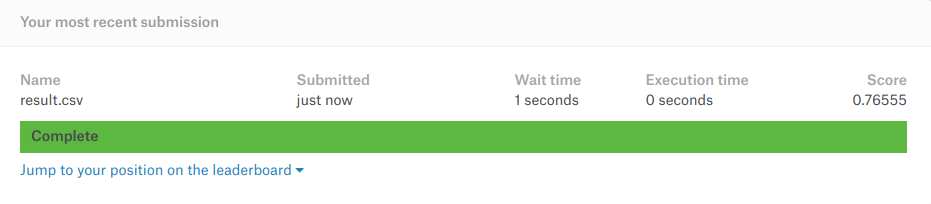

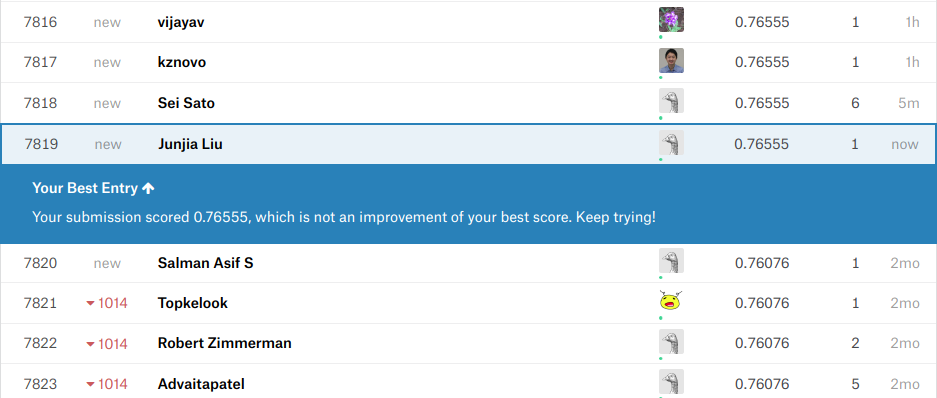

## 由此可见，SVM对于这道题来说应该不是个好办法